In [5]:
import pandas as pd

df = pd.read_csv('Bike2.csv', encoding='utf8', index_col=0)

In [12]:
df2 = df

In [22]:
df2['광고'].value_counts()

29    2868176
7      106172
13      82119
19      75476
27      74924
26      69727
25      68836
28      65383
2       59068
8       53314
17      49036
3       35546
15      28540
6       17836
12       9350
4        8685
0        7581
21       5142
1        4119
16       2389
5        1760
11       1493
23       1177
20        635
10        552
18        446
14        264
9         133
24         96
22         38
Name: 광고, dtype: int64

In [52]:
df2.head(3)

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분),주말,요일,대여소근처역,소재지,동,산업종류,광고
0,20220601,0,742,0,1,1,1,2,2,1,0,2,0,4,0,0,29
1,20220601,0,2059,0,1,1,1,1,1,1,0,2,1,21,1,1,29
2,20220601,0,1349,0,1,1,1,0,0,0,0,2,2,17,2,2,29


In [15]:
#df['대여일자'] = df['대여일자'].apply(pd.Timestamp)
df2['대여일자'] = df2['대여일자'].astype(str)
df2['대여일자'] = df2['대여일자'].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df2['대여일자'] = df2['대여일자'].astype(int)
df2.dtypes

대여일자       int32
대여시간       int64
대여소번호      int64
대여구분코드     int64
성별         int64
연령대코드      int64
이용건수       int64
운동량        int64
이동거리(M)    int64
이용시간(분)    int64
주말         int64
요일         int64
대여소근처역     int64
소재지        int64
동          int64
산업종류       int64
광고         int64
dtype: object

In [23]:
X = df2.drop(['광고'], axis=1)
Y = df2['광고']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [25]:
#기본적인 randomforest모형

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
clf.fit(X_train,Y_train)

predict1 = clf.predict(X_test)
print(accuracy_score(Y_test,predict1))

0.7753054793384556


In [34]:
# Xgboost

import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=0)

#dtrain = xgb.DMatrix(data=X_train, label=y_train)
#dval = xgb.DMatrix(data=X_val, label=y_val)
#dtest = xgb.DMatrix(data=X_test)

In [39]:
import xgboost
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=6)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

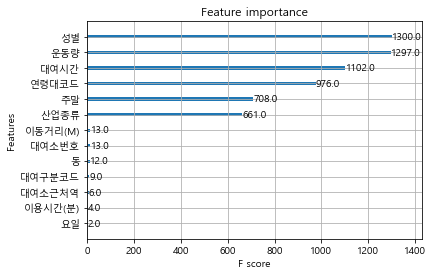

In [48]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

ax = xgboost.plot_importance(xgb_model)

In [41]:
predictions = xgb_model.predict(X_test)
predictions

array([26.390045, 28.543428, 27.64158 , ..., 16.587568, 29.270794,
       29.258564], dtype=float32)

In [42]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions,y_test))

0.8695977608493886
0.8154033610858263


In [ ]:
ax.figure.savefig('xgboost.png', facecolor='w')